# 📘 Customer Segmentation with Clustering
---
This notebook contains the code and explanation for **Customer Segmentation with Clustering**.

In [1]:
# Your code will go here
# 📦 Load Dataset
import pandas as pd

df = pd.read_csv("dummy_telkomsel_data.csv")
df.head()

,user_id,age,city,monthly_usage_gb,device_type,tenure_months,is_4g,segment
0,1000,56,Bandung,3.68,mid-range,44,0,C
1,1001,46,Medan,0.79,feature,15,0,B
2,1002,32,Makassar,6.38,low-end,35,1,C
3,1003,25,Jakarta,2.31,feature,48,0,C
4,1004,38,Surabaya,5.84,low-end,50,0,C


In [2]:
# 🔧 Feature Engineering & Normalization
from sklearn.preprocessing import StandardScaler, LabelEncoder

df['device_type_encoded'] = LabelEncoder().fit_transform(df['device_type'])
features = ['age', 'monthly_usage_gb', 'tenure_months', 'device_type_encoded']
X = df[features]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

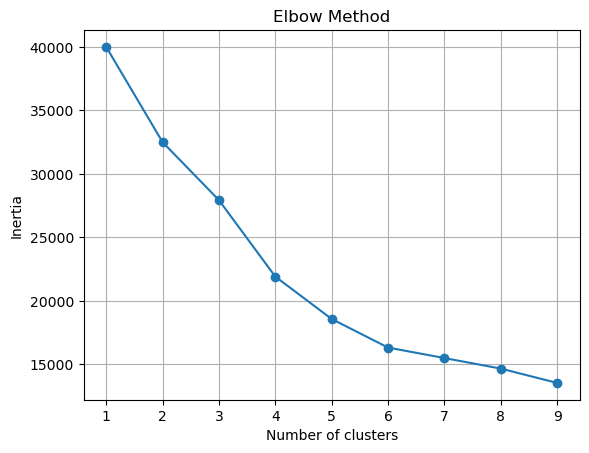

In [3]:
# 🔍 Elbow Method to Determine Optimal Clusters
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 10), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

# # Determine the optimal number of clusters based on the elbow method
# optimal_k = 3
# kmeans = KMeans(n_clusters=optimal_k, random_state=42)
# kmeans.fit(X_scaled)
# df['cluster'] = kmeans.labels_

In [4]:
# 🎯 Apply KMeans Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(X_scaled)
df[['user_id', 'age', 'monthly_usage_gb', 'device_type', 'tenure_months', 'cluster']].head()

,user_id,age,monthly_usage_gb,device_type,tenure_months,cluster
0,1000,56,3.68,mid-range,44,2
1,1001,46,0.79,feature,15,1
2,1002,32,6.38,low-end,35,0
3,1003,25,2.31,feature,48,0
4,1004,38,5.84,low-end,50,2


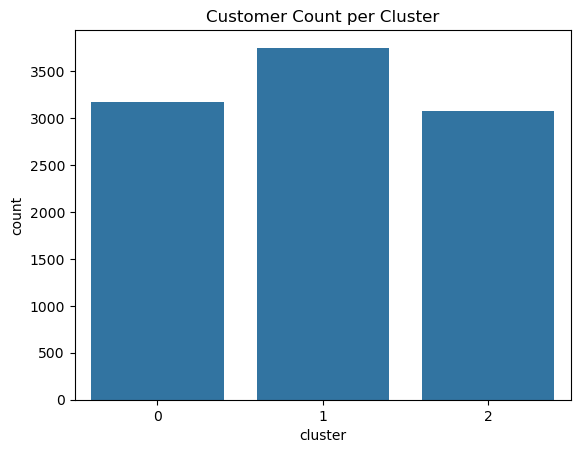

In [5]:
# 📊 Visualize Cluster Distribution
import seaborn as sns

sns.countplot(data=df, x='cluster')
plt.title('Customer Count per Cluster')
plt.show()

In [9]:
# 📈 Cluster Summary
df.groupby('cluster')[['age', 'monthly_usage_gb', 'tenure_months']].median()

,age,monthly_usage_gb,tenure_months
cluster,,,
0,27.0,2.11,40.0
1,39.0,2.05,12.0
2,50.0,1.99,42.0


In [8]:
display(df.groupby('cluster')[['age', 'monthly_usage_gb', 'tenure_months']].min())
display(df.groupby('cluster')[['age', 'monthly_usage_gb', 'tenure_months']].max())

,age,monthly_usage_gb,tenure_months
cluster,,,
0,18,0.0,13
1,18,0.0,1
2,37,0.0,17


,age,monthly_usage_gb,tenure_months
cluster,,,
0,40,23.96,59
1,59,22.91,30
2,59,25.90,59
